In [14]:
import os
import tensorflow as tf
from tensorflow import keras

train_diseased_dir='C:\\Users\\Dell\Desktop\\Tensoflow\\Cotton leaf disease\\Cotton Disease\\train\\diseased cotton leaf'
train_notdiseased_dir='C:\\Users\\Dell\Desktop\\Tensoflow\\Cotton leaf disease\\Cotton Disease\\train\\fresh cotton leaf'

validation_diseased_dir='C:\\Users\\Dell\Desktop\\Tensoflow\\Cotton leaf disease\\Cotton Disease\\test\\fresh cotton leaf'
validation_notdiseased_dir='C:\\Users\\Dell\Desktop\\Tensoflow\\Cotton leaf disease\\Cotton Disease\\test\\fresh cotton leaf'


In [15]:
train_diseased_name=os.listdir(train_diseased_dir)
train_notdiseased_name=os.listdir(train_notdiseased_dir)

validation_diseased_name=os.listdir(validation_diseased_dir)
validation_notdiseased_name=os.listdir(validation_notdiseased_dir)


In [16]:
print('total training diseased images :', len(os.listdir(      train_diseased_dir ) ))
print('total training non diseased images :', len(os.listdir(      train_notdiseased_dir ) ))

print('total validation diseased images :', len(os.listdir( validation_diseased_dir ) ))
print('total validation not diseased images :', len(os.listdir( validation_notdiseased_dir ) ))

total training diseased images : 288
total training non diseased images : 427
total validation diseased images : 26
total validation not diseased images : 26


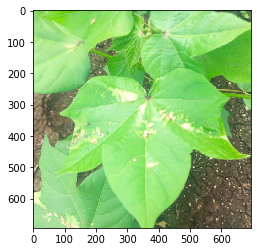

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_path_diseased=os.path.join(train_diseased_dir,train_diseased_name[0])
img_path_not=os.path.join(train_notdiseased_dir,train_notdiseased_name[0])

img=mpimg.imread(img_path_diseased)
plt.imshow(img)

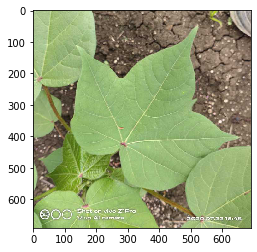

In [18]:
img=mpimg.imread(img_path_not)
plt.imshow(img)

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen=ImageDataGenerator(rescale=1.0/255.)

train_generator=train_datagen.flow_from_directory(
'C:\\Users\\Dell\Desktop\\Tensoflow\\Cotton leaf disease\\Cotton Disease\\train\\',
 batch_size=10,
 class_mode='binary',
 target_size=(150,150))

validation_generator=test_datagen.flow_from_directory(
'C:\\Users\\Dell\Desktop\\Tensoflow\\Cotton leaf disease\\Cotton Disease\\val',
batch_size=10,
class_mode='binary',
target_size=(150,150)
)

Found 715 images belonging to 2 classes.
Found 109 images belonging to 2 classes.


In [20]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(448, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

history = model.fit(train_generator, epochs=15, steps_per_epoch=715//10, validation_data = validation_generator, verbose = 1, validation_steps=52//10)

model.save("rps.h5")


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 128)      

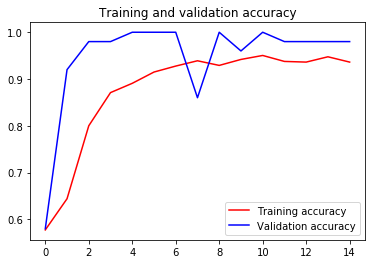

<Figure size 432x288 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

Text(0.5, 1.0, 'Training and validation loss')

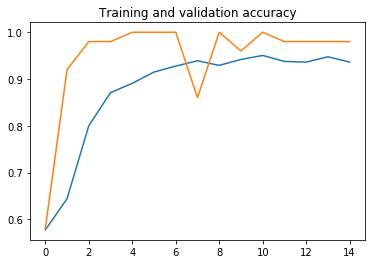

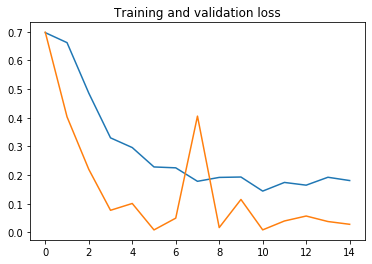

In [24]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [42]:
import numpy as np
from keras.preprocessing import image
 
  # predicting images


path = 'C:/Users/Dell/Desktop/Tensoflow/Cotton leaf disease/Cotton Disease/test/fresh cotton leaf/'
img = image.load_img(path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)

print(classes)


"\npath = 'C:/Users/Dell/Desktop/Tensoflow/Cotton leaf disease/Cotton Disease/test/fresh cotton leaf/'\nimg = image.load_img(path, target_size=(150, 150))\nx = image.img_to_array(img)\nx = np.expand_dims(x, axis=0)\n\nimages = np.vstack([x])\nclasses = model.predict(images, batch_size=10)\n\nprint(classes)\n"

In [51]:
image_path = "C:\\Users\\Dell\\Desktop\\Tensoflow\\Cotton leaf disease\\Cotton Disease\\test\\fresh cotton leaf"

images = []
    
# load all images into a list
for img in os.listdir(image_path):
        img = os.path.join(image_path, img)
        img = image.load_img(img, target_size=(150,150))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        # normalize the image
        processed_image = np.array(img, dtype="float") / 255.0
        images.append(processed_image)

images = np.vstack(images)

images_data = []
filenames = []
for filename in os.listdir(image_path):    
    pred_result = model.predict(images)
    images_data.append(pred_result)
    filenames.append(filename)
